## Identifying Heavy Traffic Indicators 
In this project I'll be looking at heavy traffic indicators on the I-94 Interstate highway for the westbound journey from Saint Paul to Minneapolis. The data is taken from the UCI machine learning repository and can be accessed here: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

To begin, as always, I read in my dataset using pandas and inspect the first and last 5 rows as well as some metadata on the dataset.

In [1]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Data Analysis

I'll start my analysis by looking at the traffic_volume column through the creation of a histogram.

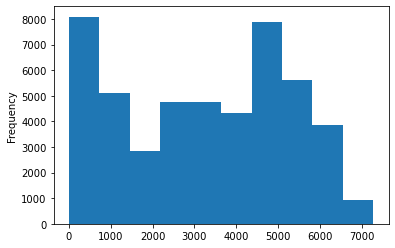

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.show()
i_94['traffic_volume'].describe()

From the histogram generated, as well as the description of the data, I can see that the hourly traffic between the start and end of the day, the traffic volume varied from - to 7280 cars, and the average volume was 3260 cars.
About 25% of the time, there were only 1193 cars or fewer passing the station each hour, however, another 25% of the time, there were 4933 cars or more. Let's start to look at how this volume is distributed over the day/night.

## Traffic: Day vs Night
I'll start by dividng the dataset into daytime and nighttime, so we can get an idea of their distributions. 
I will say that:

    Daytime data: hours from 7 AM to 7 PM (12 hours)
    Nighttime data: hours from 7 PM to 7 AM (12 hours)


In [5]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour>=19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


Now that I've isolated the data, I can see that there are actually more values in the night column. This is probably due to some missing values in the day column and shouldn't be too alarming or a cause for concern. Let's now plot histograms for both day and night and compare them to one another.

I need to ensure that I add titles, x and y labels, as well as bring the x and y axis to the same ranges in order for our comparison of the two histograms to be significant and useful.

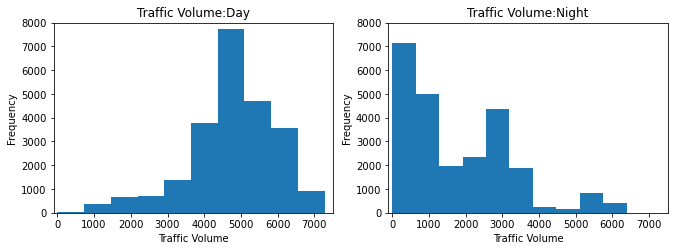

In [6]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume:Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot (1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume:Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [7]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Looking for patterns in our data - time

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

I'm going to look at a few line plots showing how the traffic volume changes according to the month, which day of the week it is, and of course, the time of day.

Let's start with the months.

Here I use a groupby method to group the dataset by the month column with the mean as an aggregate function.

In [9]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
# by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

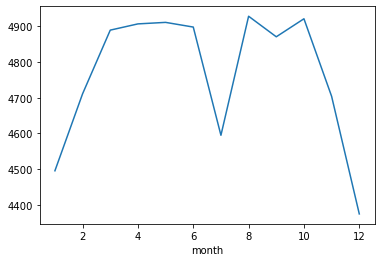

In [30]:
by_month['traffic_volume'].plot.line()
plt.show()

I could use this, however, I want to have create a graph with a little more information, therefore I will add labels and more ticks to the x axis, as well as using the describe() function to get more information on the spread of the data.

count      12.000000
mean     4767.211825
std       190.013332
min      4374.834566
25%      4676.829675
50%      4880.096353
75%      4907.951131
max      4928.302035
Name: traffic_volume, dtype: float64


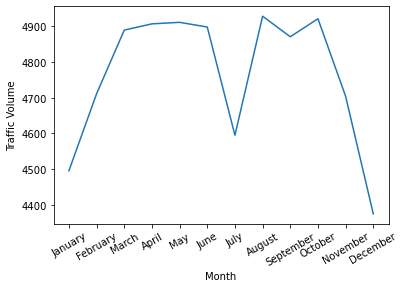

In [26]:
print (by_month['traffic_volume'].describe())
by_month['traffic_volume'].plot.line()
month_numbers = [1,2,3,4,5,6,7,8,9,10,11,12]
month_names = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December']
plt.xticks(month_numbers, month_names,rotation=30)
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

What this shows us is that during daytime, the traffic volume averages at 4767 cars, the smallest number of hourly traffic volume is 4374, and the largest number is 4928. It is clear, however, that the numbers are definitely in decline and lower in the winter months, notably we see a dip in October, and then it builds back up starting in February.
Strangely, There is a dip in July, Let's try to figure out why that is.

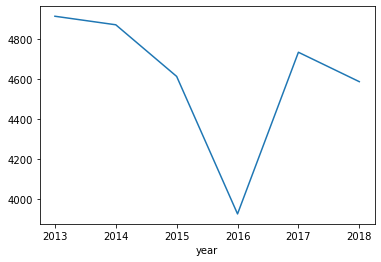

In [27]:
day['year']=day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. Maybe there was renovation on that highway, or something of the sort. As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

Next, I'll look create a lineplot for the traffic volume on different days of the week and say what I can infer from those.

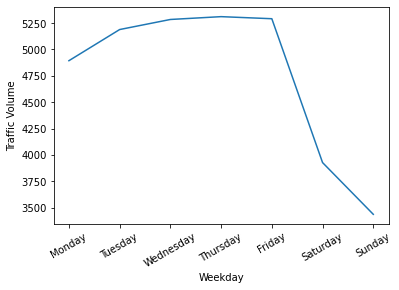

count       7.000000
mean     4761.958037
std       764.684759
min      3436.541789
25%      4410.400422
50%      5189.004782
75%      5288.027555
max      5311.303730
Name: traffic_volume, dtype: float64

In [32]:
day['dayofweek']= day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
weekday_number = [0,1,2,3,4,5,6]
weekday_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(weekday_number,weekday_name,rotation=30)
plt.xlabel('Weekday')
plt.ylabel('Traffic Volume')
plt.show()
by_dayofweek['traffic_volume'].describe()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

Finally, I'll create a lineplot for the traffic volume on at different days in the day. As I just mentioned though, the traffic volume is significantly heavier on business days compared to the weekends; therefore, I'll be creating averages for business days and weekends separately, as the weekends would definitely skew the business days results.

In [33]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek']<= 4] 
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


In [42]:
by_hour_business['traffic_volume'].describe()

count      12.000000
mean     5192.498812
std       615.622781
min      4378.419118
25%      4799.891475
50%      5024.132518
75%      5640.880110
max      6189.473647
Name: traffic_volume, dtype: float64

In [43]:
by_hour_weekend['traffic_volume'].describe()

count      12.000000
mean     3709.128440
std       911.307344
min      1589.365894
25%      3542.880206
50%      4098.037442
75%      4346.478609
max      4372.482883
Name: traffic_volume, dtype: float64

Using the above describe() information, I know what paramters (size, limits) I need to think about to create my line plots.

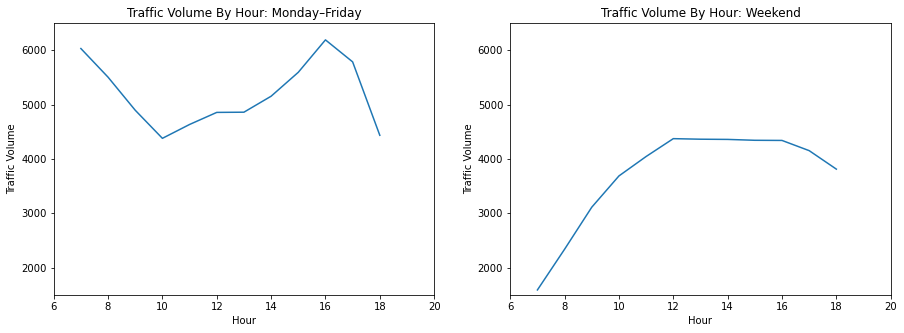

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7am and 4pm — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

    The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    The traffic is usually heavier on business days compared to weekends.
    On business days, the rush hours are around 7am and 4pm.

## Looking for patterns in our data - weather

The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [47]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

I'll now generate a scatter plot to visualize the correlation between temp and traffic_volume.

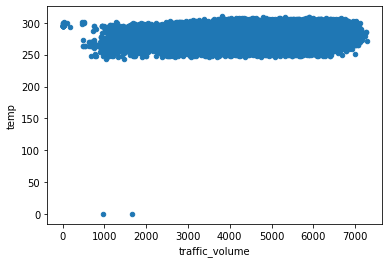

In [49]:
day.plot.scatter('traffic_volume','temp')
plt.show()

Unfortunately, two wrong traffic_volume values mess up the entire scatter plot. I have two choices here, either do some data cleaning, and get rid of those values altogether, or, use the plt.ylim function to only show values in the relevent range. I'll go with the latter.

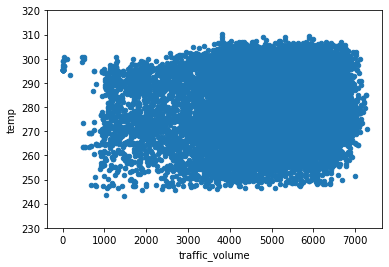

In [51]:
day.plot.scatter('traffic_volume','temp')
plt.ylim(230,320)
plt.show()

Unfortunately, we can conclude that the temperature doesn't look like a good indicator for heavy traffic. 
We've now looked to find correlation in the number columns for weather, but how about the the other ones, weather_main, and weather_description? 

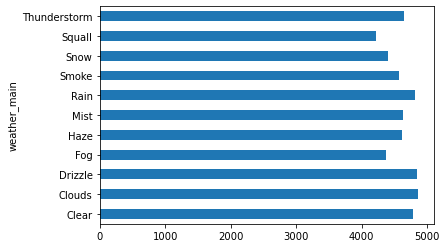

In [52]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It looks like there's no weather type where the average traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Now, I'll group by weather_description, and see what I can learn from that.

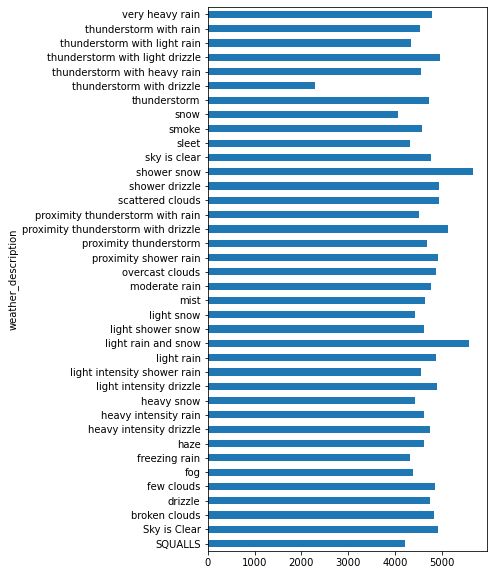

In [53]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

    Shower snow
    Light rain and snow
    Proximity thunderstorm with drizzle

What this probably tells us is that people take their cars out of the garage when the weather is bad instead of riding a bike or walking, and when the water is absolutely terrible, they don't leave their houses at all.

## Conclusions

In this project, I tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

    Time indicators
        The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
        The traffic is usually heavier on business days compared to the weekends.
        On business days, the rush hours are around 7am and 4pm.
        
    Weather indicators
        Shower snow
        Light rain and snow
        Proximity thunderstorm with drizzle

Unfortunately, the insights reached from this project weren't really groundbreaking, and I guess that is probably what a lot of data analysis is going to look like. I guess in my head I'm always thinking, "what crazy insight will I find in this dataset" but really that's an innacurate assumption about the job and the kind of results that I'm going to find. Instead it's about highlighting these more minor things, and seeing what can be done about them.

Overall I'm quite happy with this project. It was my first data visualization project and I feel quite confident now working with matplotlib.pyplot and doing pandas visualizations. Next, hopefully, will be a project using Seaborn as it is really the industry standard library for datavis.